In [ ]:
from google.colab import files

aws_saas = files.upload()

Saving SaaS-Sales.csv to SaaS-Sales.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#from adjustText import adjust_text

saas = pd.read_csv(io.BytesIO(aws_saas['SaaS-Sales.csv']))

saas.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [ ]:
print(saas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [ ]:
print(saas.shape)

(9994, 19)


In [ ]:
# Validating Order Date and Date Key

#1. Coverting Order Date to datetime
saas['Order Date'] = pd.to_datetime(saas['Order Date'])

#2. Create an expected key and converting the date to integer string.
saas['Expected Key'] = saas['Order Date'].dt.strftime('%Y%m%d').astype(int)

#3. Comparing expected key to Date Key
mismatches = saas['Expected Key'] != saas['Date Key']

print(f"Number of mismatches: {mismatches.sum()}")
if mismatches.sum() > 0:
    display(saas[mismatches])
else:
    print("No mismatches found between 'Expected Key' and 'Date Key'.")

Number of mismatches: 0
No mismatches found between 'Expected Key' and 'Date Key'.


In [ ]:
# Removing Date Key o reduce noise.
saas = saas.drop(columns= ['Date Key'])

In [ ]:
# Data validation check for %ges in Discount. Validation is the discount should not be less than 0 or greater than 100

def clean_discount(x):
  if x < 0:
    x = abs(x)
  elif x > 1:
    x = x/100
  return x

saas['Discount'] = saas['Discount'].apply(clean_discount)

In [ ]:
# Converting floating point in Discount to Percentage
saas['Discount'] = saas['Discount'].map('{:.2}'.format)

In [ ]:
# Basic Normalization of handling whitespaces
saas['Product'] = saas['Product'].str.strip().str.title()

# Extracting all the prodcuts that contain white spaces in their names
products_no_whitespace = saas[~saas['Product'].str.contains(r'\s')]['Product'].unique()

# Since there are 2 values to be replaced, will do them individually.
saas['Product'] = saas['Product'].replace('Financehub', 'Finance Hub') # Finance Hub

saas['Product'] = saas['Product'].replace('Contactmatcher', 'Contact Matcher') #Contact Matcher


# Standardizing Product Tier. If the name of product consists "Gold" then that product is a Premium one, else Standard.
saas['Product Tier'] = np.where(saas['Product'].str.contains('Gold'), 'Premium', 'Standard')


In [ ]:
# Extracting Order Year and Order Month from Order Date to visualize Time Series Analysis
saas['Order Year'] = saas['Order Date'].dt.year
saas['Order Month'] = saas['Order Date'].dt.month

In [ ]:
# Calculating Margin Percent to see the margin per transaction.
saas['Margin Percent'] = (saas['Profit'] / saas['Sales']) * 100

In [ ]:
saas.head(5)

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,License,Sales,Quantity,Discount,Profit,Expected Key,Product Tier,Order Year,Order Month,Margin Percent
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,16GRM07R1K,261.9600,2,0.0,41.9136,20221109,Standard,2022,11,16.00
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,QLIW57KZUV,731.9400,3,0.0,219.5820,20221109,Standard,2022,11,30.00
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,...,JI6BVL70HQ,14.6200,2,0.0,6.8714,20220613,Standard,2022,6,47.00
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,DE9GJKGD44,957.5775,5,0.45,-383.0310,20211011,Standard,2021,10,-40.00
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,OIF7NY23WD,22.3680,2,0.2,2.5164,20211011,Premium,2021,10,11.25


In [ ]:
# Storing updated data into a new csv file
Cleaned_SaaS = saas.to_csv('Cleaned_SaaS.csv', index=False)

## Descriptive Analysis of the data

Business Question 1: Which Region is the fastest growing in terms of Sales?

In [ ]:


# Calculating the total sales from earliest date to the latest data and computing total percentage growth for each region

# Renaming 'Cleaned_Saas' to 'AWS_SaaS'
AWS_SaaS = pd.read_csv('Cleaned_SaaS.csv')

# Converting 'Order Date' to datetime
AWS_SaaS['Order Date'] = pd.to_datetime(AWS_SaaS['Order Date'])

# Extracting year from the date.
AWS_SaaS['Year'] = AWS_SaaS['Order Date'].dt.year

# Grouping the data to see total sales for every combination of region and year
year_sales = AWS_SaaS.groupby(['Region', 'Year'])['Sales'].sum().reset_index()

# Pivoting the table to put year as columns
pivot_aws = year_sales.pivot(index='Region', columns='Year', values='Sales')

# Calculating Growth Percentage - Formula: ((Latest year - First year) / First Year) * 100
start_year = pivot_aws.columns.min()
end_year = pivot_aws.columns.max()

pivot_aws['Growth %'] = ((pivot_aws[end_year] - pivot_aws[start_year]) / pivot_aws[start_year]) * 100

# Formatting values for better visibility
pd.options.display.float_format = '{:.2f}'.format

# Determining fastest growing region in terms of Sales
fastest_growing_region = pivot_aws.sort_values(by='Growth %', ascending = False)

print(f"--- Sales Growth from {start_year} to {end_year} ---")
print(fastest_growing_region)

--- Sales Growth from 2020 to 2023 ---
Year        2020      2021      2022      2023  Growth %
Region                                                  
AMER   156450.60 163271.52 230846.29 287281.19     83.62
APJ     91284.45  86004.54 109524.61 128650.64     40.93
EMEA   236512.45 221256.45 268102.93 318015.19     34.46


As per the findings, we can see Americas is the fastest growing in terms of AWS services sales

Business Question 2: Who are the Top 10 Customers by Sales volume?

In [ ]:
# Get Top 10 Customers by sales volume
# Group by 'Customer', sum 'Sales', and then find the 10 largest
top10_customers_by_sales = AWS_SaaS.groupby('Customer')['Sales'].sum().nlargest(10).reset_index()

# Printing the result
print("The top 10 customers by Sales volume:")
display(top10_customers_by_sales)

The top 10 customers by Sales volume:


,Customer,Sales
0,Anthem,55719.21
1,Ford Motor,43893.04
2,Allianz,42904.17
3,Bank of America Corp.,41255.95
4,Valero Energy,41220.42
5,Lowes,40360.16
6,Tyson Foods,40326.34
7,Allstate,39941.64
8,AmerisourceBergen,39234.76
9,BMW,39083.79


From the output above, Customer "Anthem" has generated highest number of Sales

Business Question 3: What is the overall profit margin by Region and Product?

In [ ]:
# Overall Profit Margin by Region and Product

Profit_margin_by_region_product = AWS_SaaS.groupby(['Region', 'Product'])['Profit'].sum().reset_index()

# Pivoting the profit margin for better clarity and visibility
pivot_profit = Profit_margin_by_region_product.pivot(index='Region', columns='Product', values='Profit')

# Printing the result
print("Overall Profit Margin by Region and Product:")
display(pivot_profit)

Overall Profit Margin by Region and Product:


Product,Alchemy,Big Ol Database,Chatbot Plugin,Contact Matcher,Data Smasher,Finance Hub,Marketing Suite,Marketing Suite - Gold,Oneview,Saas Connector Pack,Saas Connector Pack - Gold,Site Analytics,Storage,Support
Region,,,,,,,,,,,,,,
AMER,18264.26,-4369.38,2698.81,26663.96,19152.03,9255.07,52.78,10364.85,10613.30,8690.48,2408.61,9272.64,407.25,13952.33
APJ,17819.87,-2077.91,1122.51,-21583.66,4244.80,1652.32,-1895.66,2718.01,-5270.84,-3774.06,1885.88,10631.05,170.56,5871.14
EMEA,19533.70,9832.04,2706.47,7415.98,18539.81,21229.03,-1629.67,8195.96,12795.55,8142.72,2669.69,24612.04,371.71,13041.00


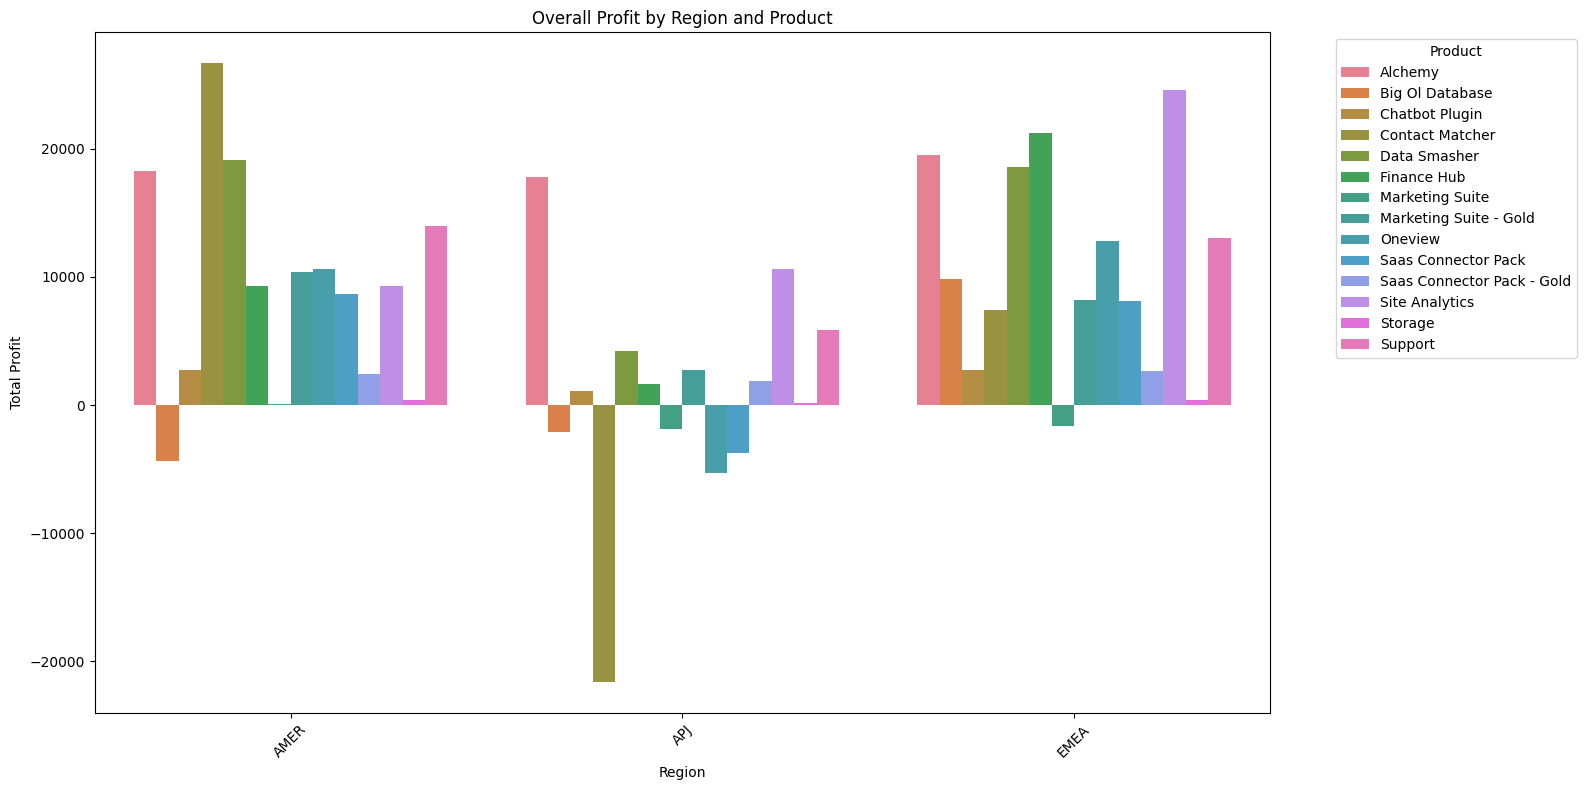

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.barplot(x='Region', y='Profit', hue='Product', data=Profit_margin_by_region_product)
plt.title('Overall Profit by Region and Product')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product')
plt.tight_layout()
plt.show()

From the bar chart showing the 'Overall Profit by Region and Product', we can derive several key insights:

##### Product Performance Varies Significantly:
Some products, like 'Contact Matcher', 'Oneview', and 'Alchemy', appear to be highly profitable across all regions. In contrast, 'Big Ol Database' consistently shows negative profit (losses) in every region.

##### Regional Profitability Differences:
Regions like EMEA and AMER generally exhibit higher profit margins for most products compared to APJ.

##### Opportunities for Improvement:

The 'Big Ol Database' product is a significant loss-maker across all regions, indicating a need for review or strategic changes for this product. Similarly, 'Marketing Suite' shows relatively low profits compared to other offerings.

In summary, 'Contact Matcher' and 'Oneview' are strong performers, while 'Big Ol Database' is a consistent underperformer requiring immediate attention.

Business Question 4: Do 20% of your products generate 80% of your revenue?

In [ ]:
# Checking if cumulative sum of the top products crosses the 80% threshold quickly.

# Grouping by product and Sum Sales
product_sales = AWS_SaaS.groupby('Product')['Sales'].sum().sort_values(ascending = False)

# Calculating cumulative percentage
cumulative_sales = product_sales.cumsum()
total_sales = product_sales.sum()
cumulative_percent = cumulative_sales / total_sales * 100

# Check the 20% mark
# Calculating the total products that constitute 20% of the catalog
top_20_count = int(len(product_sales) * 0.2)

# Revenue share of top 20%
revenue_share = cumulative_percent.iloc[top_20_count - 1]


print(f"The top 20% of produts generate{revenue_share: .2f}% of total revenue")


The top 20% of produts generate 32.71% of total revenue


So, the product sales do not follow th 80/20 rule. The top 20% of products generate 32.71% of the total revenue, so the product sales is spread out among different resources. This shows there is no clear Market leader.

Lets identify which products have the highest potential. Meaning, finding out which products are growing fast (Year-over-Year) and are profitable

In [ ]:
# Dynamic Year Selection
unique_years = sorted(AWS_SaaS['Year'].unique())

if len(unique_years) < 2:
  print("Error: Insufficient data for year-over-year analysis.")
else:
  # Automatically pick out the last 2 years of the list
  latest_year = unique_years[-1]
  prior_year = unique_years[-2]

  print(f"Analyzing Growth between {prior_year} and {latest_year}...")

  # Calculate Sales by Year
  sales_by_year = AWS_SaaS.groupby(['Product', 'Year'])['Sales'].sum().unstack(fill_value=0)

  # Calculating Dynamic YoY Growth
  sales_by_year['YoY%'] = (
   (sales_by_year[latest_year] - sales_by_year[prior_year]) / sales_by_year[prior_year]
  ) * 100

  # Calculating Efficiency Metrics (Overall)
  product_metrics = AWS_SaaS.groupby('Product').agg({
      'Sales': 'sum',
      'Profit': 'sum',
      'Discount': 'mean',
      'Order ID': 'nunique'
  }).rename(columns={'Order ID': 'Transaction_Count'})

  # Calculating Profit Margin %
  product_metrics['Profit_Margin%'] = (product_metrics['Profit'] / product_metrics['Sales']) * 100

  # Merging Growth data with Efficiency Data
  potentital_df = product_metrics.join(sales_by_year['YoY%'])

  # Filter for "High Potential"
    # Logic: Positive Growth AND Healthy Margin (> 10%) AND Low Discount (< 15%)
    # We handle infinite growth (new products that had 0 sales prior year) by replacing inf with 0 or keeping them
  potentital_df = potentital_df.replace([float('inf'), -float('inf')], 0)

  high_potential = potentital_df[
      (potentital_df['YoY%'] > 0) &
      (potentital_df['Profit_Margin%'] > 10) &
      (potentital_df['Discount'] < 0.15)
  ].sort_values(by='YoY%', ascending = False)

  # Output results
  print(f"\n--- RISIING STARS(High Growth from {prior_year} to {latest_year}) ---")
  print(high_potential[['Sales','Profit_Margin%','YoY%','Discount']].round(2))

Analyzing Growth between 2022 and 2023...

--- RISIING STARS(High Growth from 2022 to 2023) ---
                        Sales  Profit_Margin%  YoY%  Discount
Product                                                      
Chatbot Plugin       27118.79           24.07 50.84      0.07
Data Smasher        167380.32           25.05 43.08      0.08
Support             125152.74           26.26 25.35      0.08
Saas Connector Pack  91705.16           14.24  3.73      0.14


These are the products that are ****growing organically****. These products have low discount with high year on year growth, meaning, customers are buying this product more in 2023 than 2022. So, the sales reps don't have to slash prices to sell these products.

/tmp/ipython-input-2176574077.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  potentital_df['Profit_Margin%'][i]+0.5,
/tmp/ipython-input-2176574077.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  potentital_df['YoY%'][i],


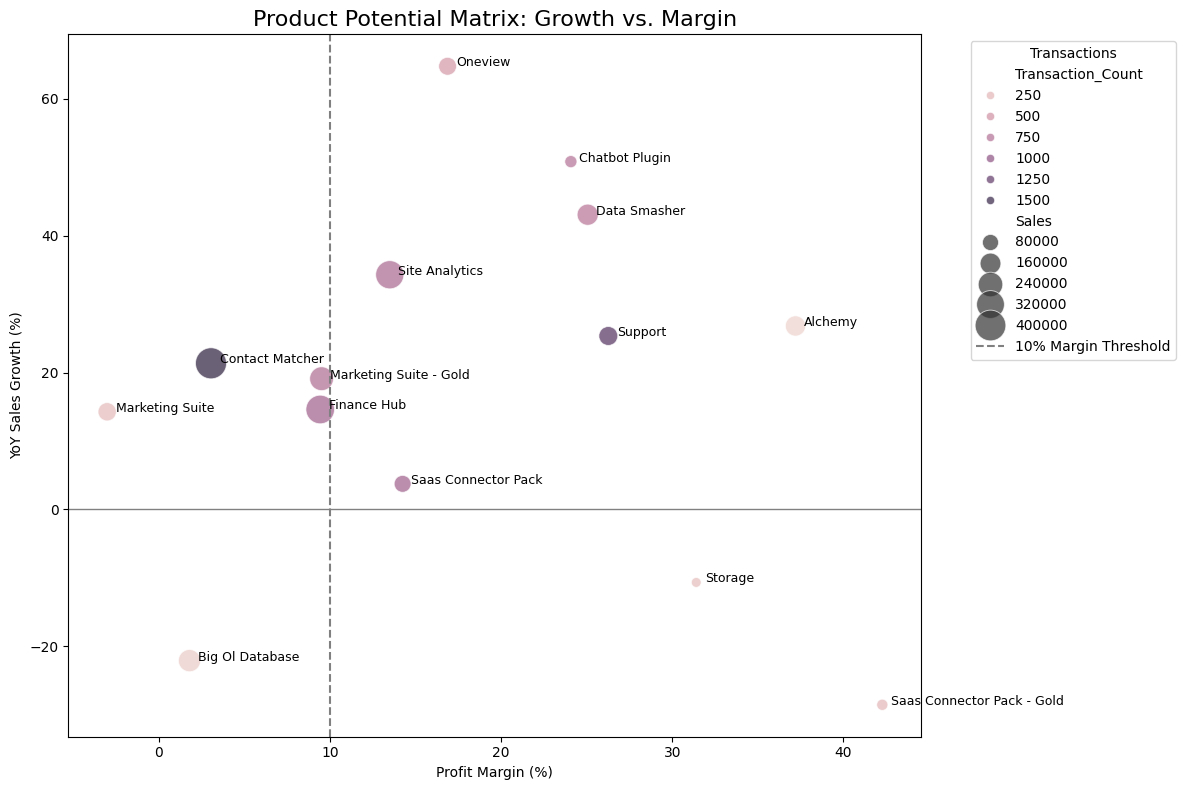

In [ ]:
# Visualizing the same
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data = potentital_df,
    x = 'Profit_Margin%',
    y = 'YoY%',
    size = 'Sales',
    sizes = (50,500),
    alpha = 0.7,
    hue = 'Transaction_Count'
)

# Add reference lines (The "Potential" Quadrant is Top-Right)
plt.axvline(x=10, color='grey', linestyle='--', label='10% Margin Threshold')
plt.axhline(y=0, color='grey', linestyle='-', linewidth=1)

# Labeling the points
for i in range(potentital_df.shape[0]):
  plt.text(
      potentital_df['Profit_Margin%'][i]+0.5,
      potentital_df['YoY%'][i],
      potentital_df.index[i],
      fontsize = 9
  )

plt.title('Product Potential Matrix: Growth vs. Margin', fontsize=16)
plt.xlabel('Profit Margin (%)')
plt.ylabel('YoY Sales Growth (%)')
plt.legend(title='Transactions', bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.show()

Looking at the figure here are potential strategic decisions that can be taken:
1. ****Top-Right Quadrant (High Growth, High Margin)****: These are Rising Stars. They are profitable and growing. Invest here.
2. ****Top-Left Quadrant (High Growth, Low Margin)****: These are "Problem Children." They are popular, but organization are losing money or barely breaking even (likely due to discounts). Need to fix the pricing model here.
3. ****Bottom-Right Quadrant (Low Growth, High Margin)****: These are Cash Cows. They aren't growing fast, but they generate safe profit. Keep them to fund the Stars.
4. ****Bottom-Left Quadrant (Low Growth, Low Margin)****: These are "Dogs." Consider discontinuing them.

Business Question 5: Which products have the highest quantity sold versus the highest revenue?

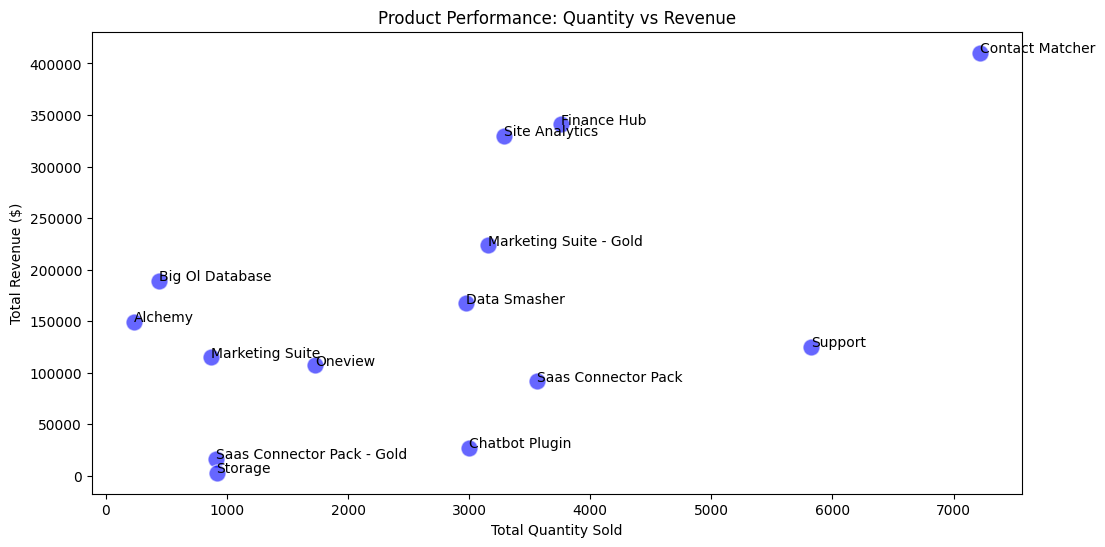

In [ ]:
# Aggregating Quanitity and Revenue into a single Dataframe
product_performance = AWS_SaaS.groupby('Product').agg({
    'Quantity': 'sum',
    'Sales': 'sum'
}).reset_index()

# Renaming Sales to revenue for clarity
product_performance = product_performance.rename(columns={'Sales': 'Revenue'})

# Visualizing the results
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data = product_performance,
    x = 'Quantity',
    y = 'Revenue',
    s = 150,
    color = 'blue',
    alpha = 0.6
)

# Labeling the datapoints
for i in range(product_performance.shape[0]):
  plt.text(
      product_performance['Quantity'][i],
      product_performance['Revenue'][i],
      s=product_performance['Product'][i],
      fontsize=10,
      color='black',
  )

plt.title('Product Performance: Quantity vs Revenue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Revenue ($)')
plt.show()

The chart helps distinguish between high-volume, high-value, and potentially problematic products, providing a basis for strategic decisions beyond just raw sales numbers when combined with profit analysis.

****Big Ol Database****: This indicates a high average selling price per unit. However, it's crucial to recall from our previous Overall Profit by Region and Product analysis that 'Big Ol Database' consistently showed negative profit margins across all regions. Therefore, while it generates good revenue for its quantity, it's not 'performing well' in terms of profitability and requires strategic re-evaluation.

****Volume and Revenue Leaders****: Contact Matcher clearly stands out as a leader in both quantity sold and total revenue. Finance Hub and Site Analytics also demonstrate strong performance in both metrics.

****High Quantity, Lower Revenue****: Products like Chatbot Plugin have a high quantity sold but comparatively lower revenue. This suggests they might be lower-priced, high-volume products, potentially acting as entry-level offerings or having a different market strategy.

****Low Quantity, Low Revenue****: Products like Alchemy and Storage appear in the bottom-left quadrant, indicating lower quantities sold and lower overall revenue. These might be niche products or require further investigation into their market fit and pricing.

Business Question 6: Which sales representative generates the highest revenue per transaction?

In [ ]:
# Grouping sales per sales representative

sales_rep_revenue = AWS_SaaS.groupby('Contact Name').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
})

sales_rep_revenue = sales_rep_revenue.rename(columns={'Order ID': 'Transaction_Count'})

sales_rep_revenue['Revenue_Per_Transaction'] = sales_rep_revenue['Sales'] / sales_rep_revenue['Transaction_Count']

sales_rep_revenue.sort_values(by='Revenue_Per_Transaction', ascending=False,inplace = True)

sales_rep_revenue.head(10)

,Sales,Transaction_Count,Revenue_Per_Transaction
Contact Name,,,
Diane Murray,25043.05,5,5008.61
Nicholas Skinner,19052.22,5,3810.44
Jennifer Payne,14595.62,4,3648.91
Emily Fisher,9351.21,3,3117.07
Melanie Davidson,11789.63,4,2947.41
Megan Smith,5253.88,2,2626.94
Cameron MacLeod,15117.34,6,2519.56
Alexander Langdon,12129.07,5,2425.81
Theresa McLean,9062.86,4,2265.72


Diane Murray has generated the highest revenue per transaction. Diane is the sales rep for Big OI Database and she generates $5008.61 per transaction

****Dignostic Analysis of the data****

Business Question 1: At what discount percentage does a sale turn unprofitable?

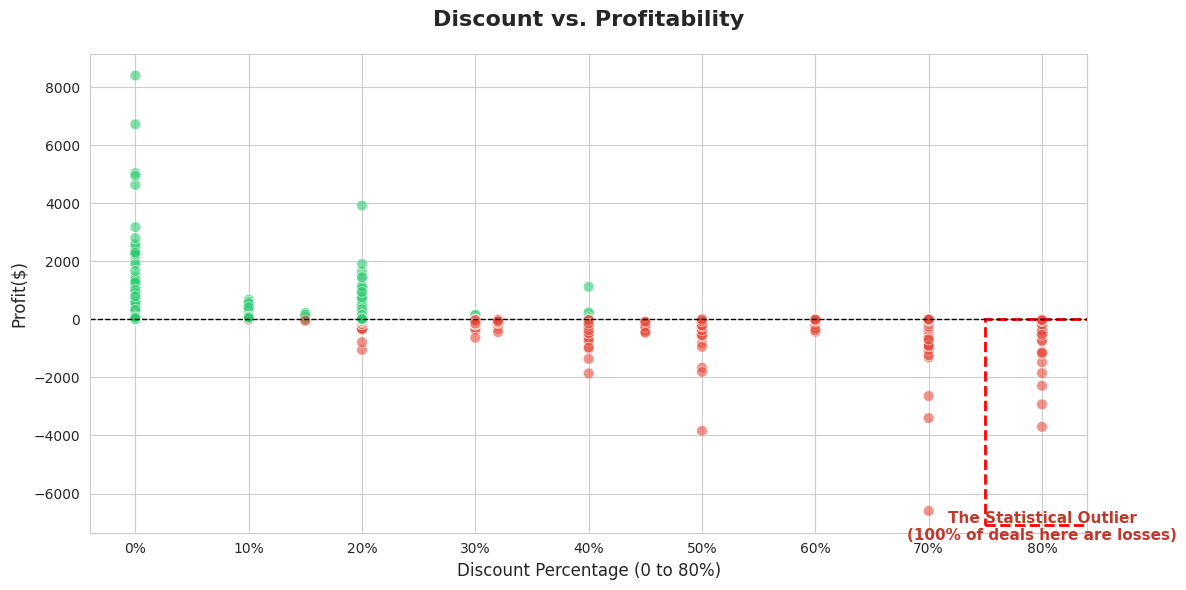

In [ ]:
# Profit Analysis

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Scatter plot
sns.scatterplot(
    data = AWS_SaaS,
    x = 'Discount',
    y = 'Profit',
    hue=AWS_SaaS['Profit'] > 0,
    palette={True: '#2ecc71', False: '#e74c3c'}, #Green for profit, Red for loss
    alpha = 0.6,
    s = 60,
    legend = False
)

# Adding reference line at 0 profit
plt.axhline(y=0, color='black', linestyle='--', linewidth = 1, label='0 Profit')

# Highlightine 80% Discount Zone
rect = patches.Rectangle((0.75,AWS_SaaS['Profit'].min() - 500),
                         0.1,
                         abs(AWS_SaaS['Profit'].min()) + 500,
                         linewidth=2,
                         edgecolor='red',
                         facecolor='none',
                         linestyle = '--'
)
plt.gca().add_patch(rect)

# Adding text to the annotation
plt.text(0.8,
         AWS_SaaS['Profit'].min() - 1000,
         "The Statistical Outlier\n(100% of deals here are losses)",
         horizontalalignment='center',
         color = '#c0392b',
         weight = 'bold',
         fontsize = 11
)

# Formatting
plt.title('Discount vs. Profitability', fontsize=16, weight='bold', pad=20)
plt.xlabel('Discount Percentage (0 to 80%)', fontsize = 12)
plt.ylabel('Profit($)', fontsize = 12)

# Showing percentages clearly in x-axis
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
           ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%'])

plt.tight_layout()
plt.show()

This chart tells us that the functioning of the business seems flawed in discount policy. The ****50%**** discount seems to the tipping point. All the dots with discounts 50% or more are in ****Red****.

So the organizations needs to re-think about their discount policy. One suggestion can be if Sales Representatives are allowed to offer discounts of 50% or more then the approval needs to come from higher executive.

Now lets analyze the relatioship between Sales Rep behavior and Profit Margin %

Business Question 2: Do specific sales representatives rely too heavily on discounts to close deals?

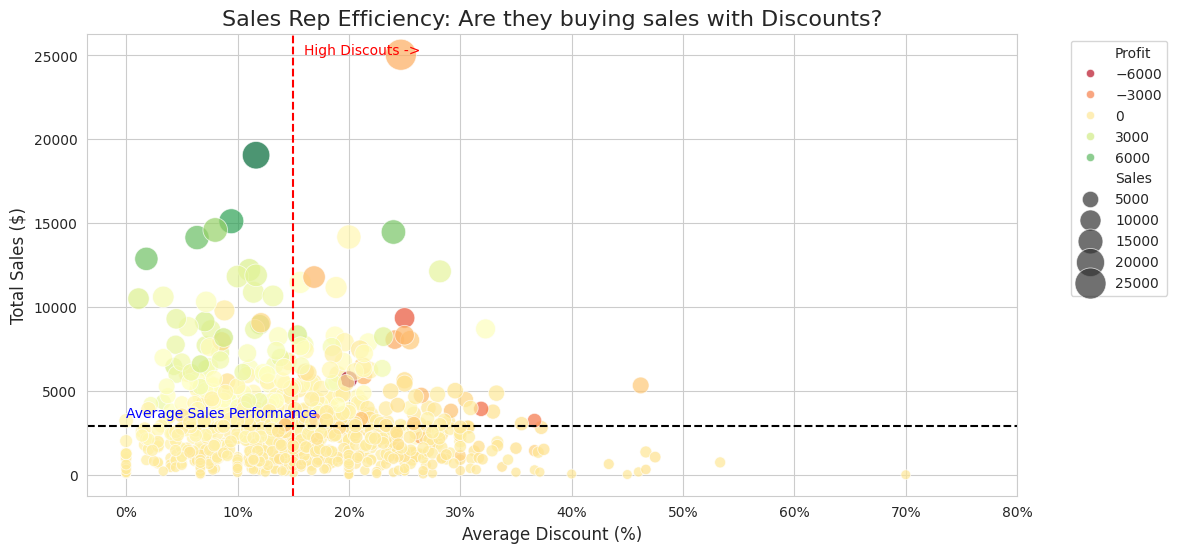

In [ ]:
from matplotlib import lines
# Finding out the relationship between Customer Name, Sales, Profit Margin and Discounts
sales_rep_beh = AWS_SaaS.groupby('Contact Name').agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
}).reset_index()

# Defining thresholds for labeling
avg_sales = sales_rep_beh['Sales'].mean()
high_discount_thresold = 0.15

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data = sales_rep_beh,
    x = 'Discount',
    y = 'Sales',
    hue = 'Profit',
    size = 'Sales',
    sizes = (50,500),
    palette = 'RdYlGn',
    alpha = 0.7
)

# Adding quadrant lines
# Vertical lines at 15% discount
plt.axvline(x=0.15,color='red',linestyle='--')
plt.text(0.16,sales_rep_beh['Sales'].max(),'High Discouts ->', color='red')


# Horizontal line at Average Sales
avg_sales = sales_rep_beh['Sales'].mean()
plt.axhline(y=avg_sales, color='black', linestyle='--')
plt.text(0, avg_sales + 500, 'Average Sales Performance', color = 'blue')

# Showing percentages clearly in x-axis
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
           ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%'])

# Labeling
plt.title("Sales Rep Efficiency: Are they buying sales with Discounts?", fontsize=16)
plt.xlabel('Average Discount (%)', fontsize = 12)
plt.ylabel('Total Sales ($)', fontsize = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()



A significant finding is that many sales representatives who offer high discounts (beyond the 15% threshold) tend to generate higher total sales, but often with lower or even negative profit margins, suggesting they might be 'buying sales' by heavily discounting products. Conversely, the more efficient sales representatives are those achieving strong total sales with lower average discounts, resulting in higher profit margins. This visual highlights individuals or groups of sales reps whose discount strategies might be detrimental to overall profitability, indicating a need to re-evaluate discount policies or provide targeted training.

Business Question 3: Does the "Gold" version of products actually drive more profit, or just cost more?



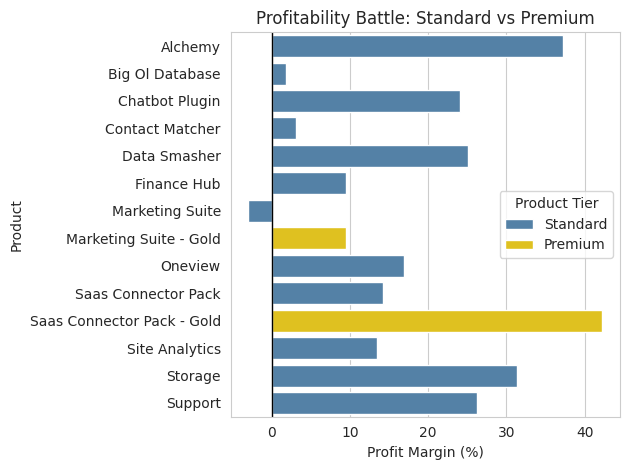

In [ ]:
# Calculating Totals by Product and Product Tier
comparison_df = AWS_SaaS.groupby(['Product','Product Tier']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

comparison_df['Profit Margin %'] = (comparison_df['Profit'] / comparison_df['Sales']) * 100

# Visualzing the data
sns.barplot(
    data = comparison_df,
    x = 'Profit Margin %',
    y = 'Product',
    hue = 'Product Tier',
    palette = {'Premium':'gold','Standard':'steelblue'}
)

# Formatting the visuals
plt.title("Profitability Battle: Standard vs Premium")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Product")
plt.legend(title='Product Tier')
plt.axvline(x=0, color='black', linewidth='1')
plt.tight_layout()
plt.show()

So, the Premium products are driving more profit than its standard products. However, if we see the Marketing Suite standard products, the profitability is negative. That means, this product might be just an entry point for customers. So this product might need to be addressed to increase its profitability. Lets check discounts for this product. Standard and Premim

In [ ]:
# Comparing discounts for Marketing Suite Product. Both Standard and Premium
marketing_suite_df = AWS_SaaS[AWS_SaaS['Product'].str.contains('Marketing Suite')]

# Extracting Sales and Discount from the Products
market_suite = marketing_suite_df.groupby(['Product','Product Tier']).agg({
    'Sales':'sum',
    'Discount':'mean'
}).reset_index()

market_suite


,Product,Product Tier,Sales,Discount
0,Marketing Suite,Standard,114880.00,0.21
1,Marketing Suite - Gold,Premium,223843.61,0.07


We can see the sales of the premium version is more with less discount than standard version. The oranganizatinon might have to re-think the discount strategy being offered for this product.

In [ ]:
AWS_SaaS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Contact Name    9994 non-null   object        
 4   Country         9994 non-null   object        
 5   City            9994 non-null   object        
 6   Region          9994 non-null   object        
 7   Subregion       9994 non-null   object        
 8   Customer        9994 non-null   object        
 9   Customer ID     9994 non-null   int64         
 10  Industry        9994 non-null   object        
 11  Segment         9994 non-null   object        
 12  Product         9994 non-null   object        
 13  License         9994 non-null   object        
 14  Sales           9994 non-null   float64       
 15  Quan

Lets now do regional analysis

Text(0, 0.5, 'Region')

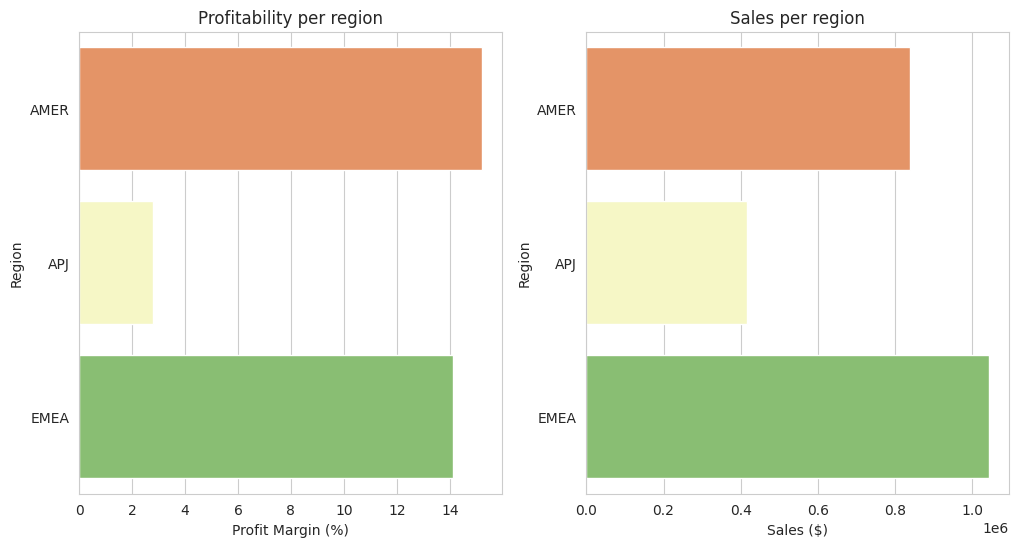

In [ ]:
# Checking the profitability for different regions

region_df = AWS_SaaS.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

region_df['Profit Margin %'] = (region_df['Profit'] / region_df['Sales']) * 100

# Plotting Profit v/s Region
figure, axes = plt.subplots(1,2,figsize=(12,6))
sns.barplot(
    data = region_df,
    x = 'Profit Margin %',
    y = 'Region',
    ax = axes[0],
    hue = 'Region',
    palette = 'RdYlGn'
)

# Formatting the visual
axes[0].set_title("Profitability per region")
axes[0].set_xlabel("Profit Margin (%)")
axes[0].set_ylabel("Region")

# Plotting Sales v/s Region
sns.barplot(
    data = region_df,
    x = 'Sales',
    y = 'Region',
    ax = axes[1],
    hue = 'Region',
    palette = 'RdYlGn'
)

# Formatting the visual
axes[1].set_title("Sales per region")
axes[1].set_xlabel("Sales ($)")
axes[1].set_ylabel("Region")

Comparing both the charts, we can see that Regions "EMEA" and "APJ" are generating less profit with higher sales.

Business Question 4: Why are we losing money in specific countries despite high sales volume?

Now, lets check the average discounts in countries in EMEA to the Global discounts

/tmp/ipython-input-343532284.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-343532284.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


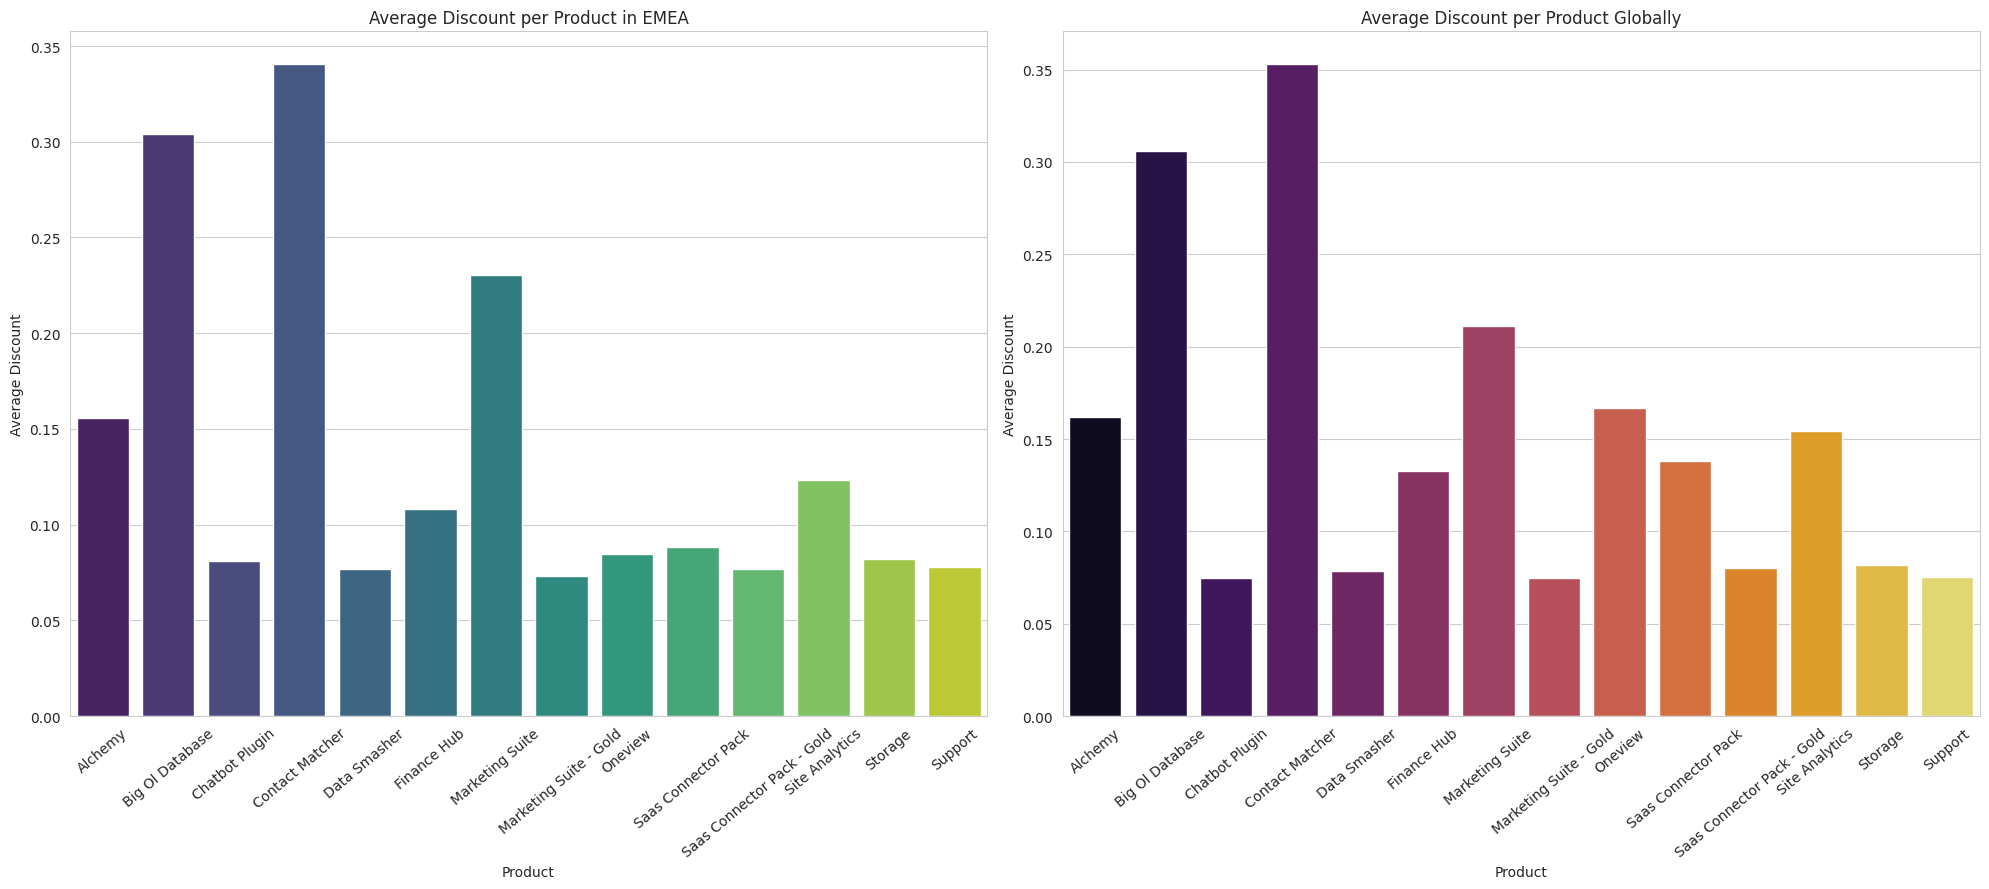

In [ ]:
# Extracting discounts from EMEA region
emea_region = AWS_SaaS[AWS_SaaS['Region'] == 'EMEA']

# Extracting Sales and Discounts of the products in this region
emea_df = emea_region.groupby('Product').agg({
    'Sales': 'sum',
    'Discount': 'mean'
}).reset_index()

# Use a bar plot to visualize average discount per product
figure, axes = plt.subplots(1,2,figsize=(20, 9))
sns.barplot(
    data=emea_df,
    x='Product',
    y='Discount',
    ax = axes[0],
    palette='viridis')
axes[0].set_title('Average Discount per Product in EMEA')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Average Discount')
# Corrected: Set properties on tick labels directly
axes[0].tick_params(axis='x', rotation=40)

# Now, extracting average discount globally
global_df = AWS_SaaS.groupby('Product').agg({
    'Sales': 'sum',
    'Discount': 'mean'
}).reset_index()

sns.barplot(
    data = global_df,
    x = 'Product',
    y = 'Discount',
    ax = axes[1],
    palette='inferno'
)
axes[1].set_title('Average Discount per Product Globally')
axes[1].set_xlabel('Product')
# Corrected: Typo 'set_ylable' changed to 'set_ylabel'
axes[1].set_ylabel('Average Discount')
axes[1].tick_params(axis='x', rotation=40) # Also add rotation for global plot labels

plt.tight_layout()
plt.show()

Initial analysis suggested regional discrepancies, but a deeper look revealed a global pattern: 'Contact Matcher' is consistently discounted at ~35%, crossing the threshold of profitability we identified earlier. This suggests a systemic pricing misalignment with the market value of this specific product, rather than a regional execution error.

In [ ]:
# Checking if customers who buy "Contact Matcher" also buy other Products in the same order.

# Identifying all orders with Contact Matcher
contact_matcher_orders = AWS_SaaS[AWS_SaaS['Product'] == 'Contact Matcher']['Order ID'].unique()

# Filtering the main dataframe to show ONLY those specific orders

bundle_data = AWS_SaaS[AWS_SaaS['Order ID'].isin(contact_matcher_orders)]

# Counting products per order
order_sizes = bundle_data.groupby('Order ID')['Product'].count().reset_index()
order_sizes.columns = ['Order ID', 'Items in Cart']

# Calculating the percentage of bundled vs Solo orders
solo_sales = order_sizes[order_sizes['Items in Cart'] == 1].shape[0]
bundled_sales = order_sizes[order_sizes['Items in Cart'] > 1].shape[0]
total_orders = solo_sales + bundled_sales

print(f"Total Orders containing ContactMatcher: {total_orders}")
print(f"Sold ALONE: {solo_sales} ({solo_sales/total_orders:.1%})")
print(f"Sold in BUNDLE: {bundled_sales} ({bundled_sales/total_orders:.1%})")

# Seeing what customers are buying with Contact Matcher
if bundled_sales > 0:
    cross_sells = bundle_data[bundle_data['Product'] != 'ContactMatcher']['Product'].value_counts()
    print("\nTop products bought with ContactMatcher:")
    print(cross_sells.head(5))

Total Orders containing ContactMatcher: 1552
Sold ALONE: 482 (31.1%)
Sold in BUNDLE: 1070 (68.9%)

Top products bought with ContactMatcher:
Product
Contact Matcher           1842
Support                    419
Site Analytics             262
Marketing Suite - Gold     259
Saas Connector Pack        258
Name: count, dtype: int64


****Hypothesis****: Is the heavy discounting on ContactMatcher justified as a 'Loss Leader' strategy?

****Finding****: Yes and No. While 69% of sales are bundled, the primary cross-sell is 'Support,' which typically has low margins. However, it also drives significant volume for 'Marketing Suite - Gold'.

****Recommendation****: Refine pricing policy to link ContactMatcher discounts specifically to High-Margin Software bundles, decoupling it from low-margin Support add-ons.